In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/algerian-forest-fires-dataset/Algerian_forest_fires_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/algerian-forest-fires-dataset/Algerian_forest_fires_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [13]:
df = df.drop(index=124).reset_index(drop=True)

In [14]:
df['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [16]:
df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
df[['day', 'month', 'year']]= df[['day', 'month', 'year']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(10), int64(3), object(1)
memory usage: 26.7+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

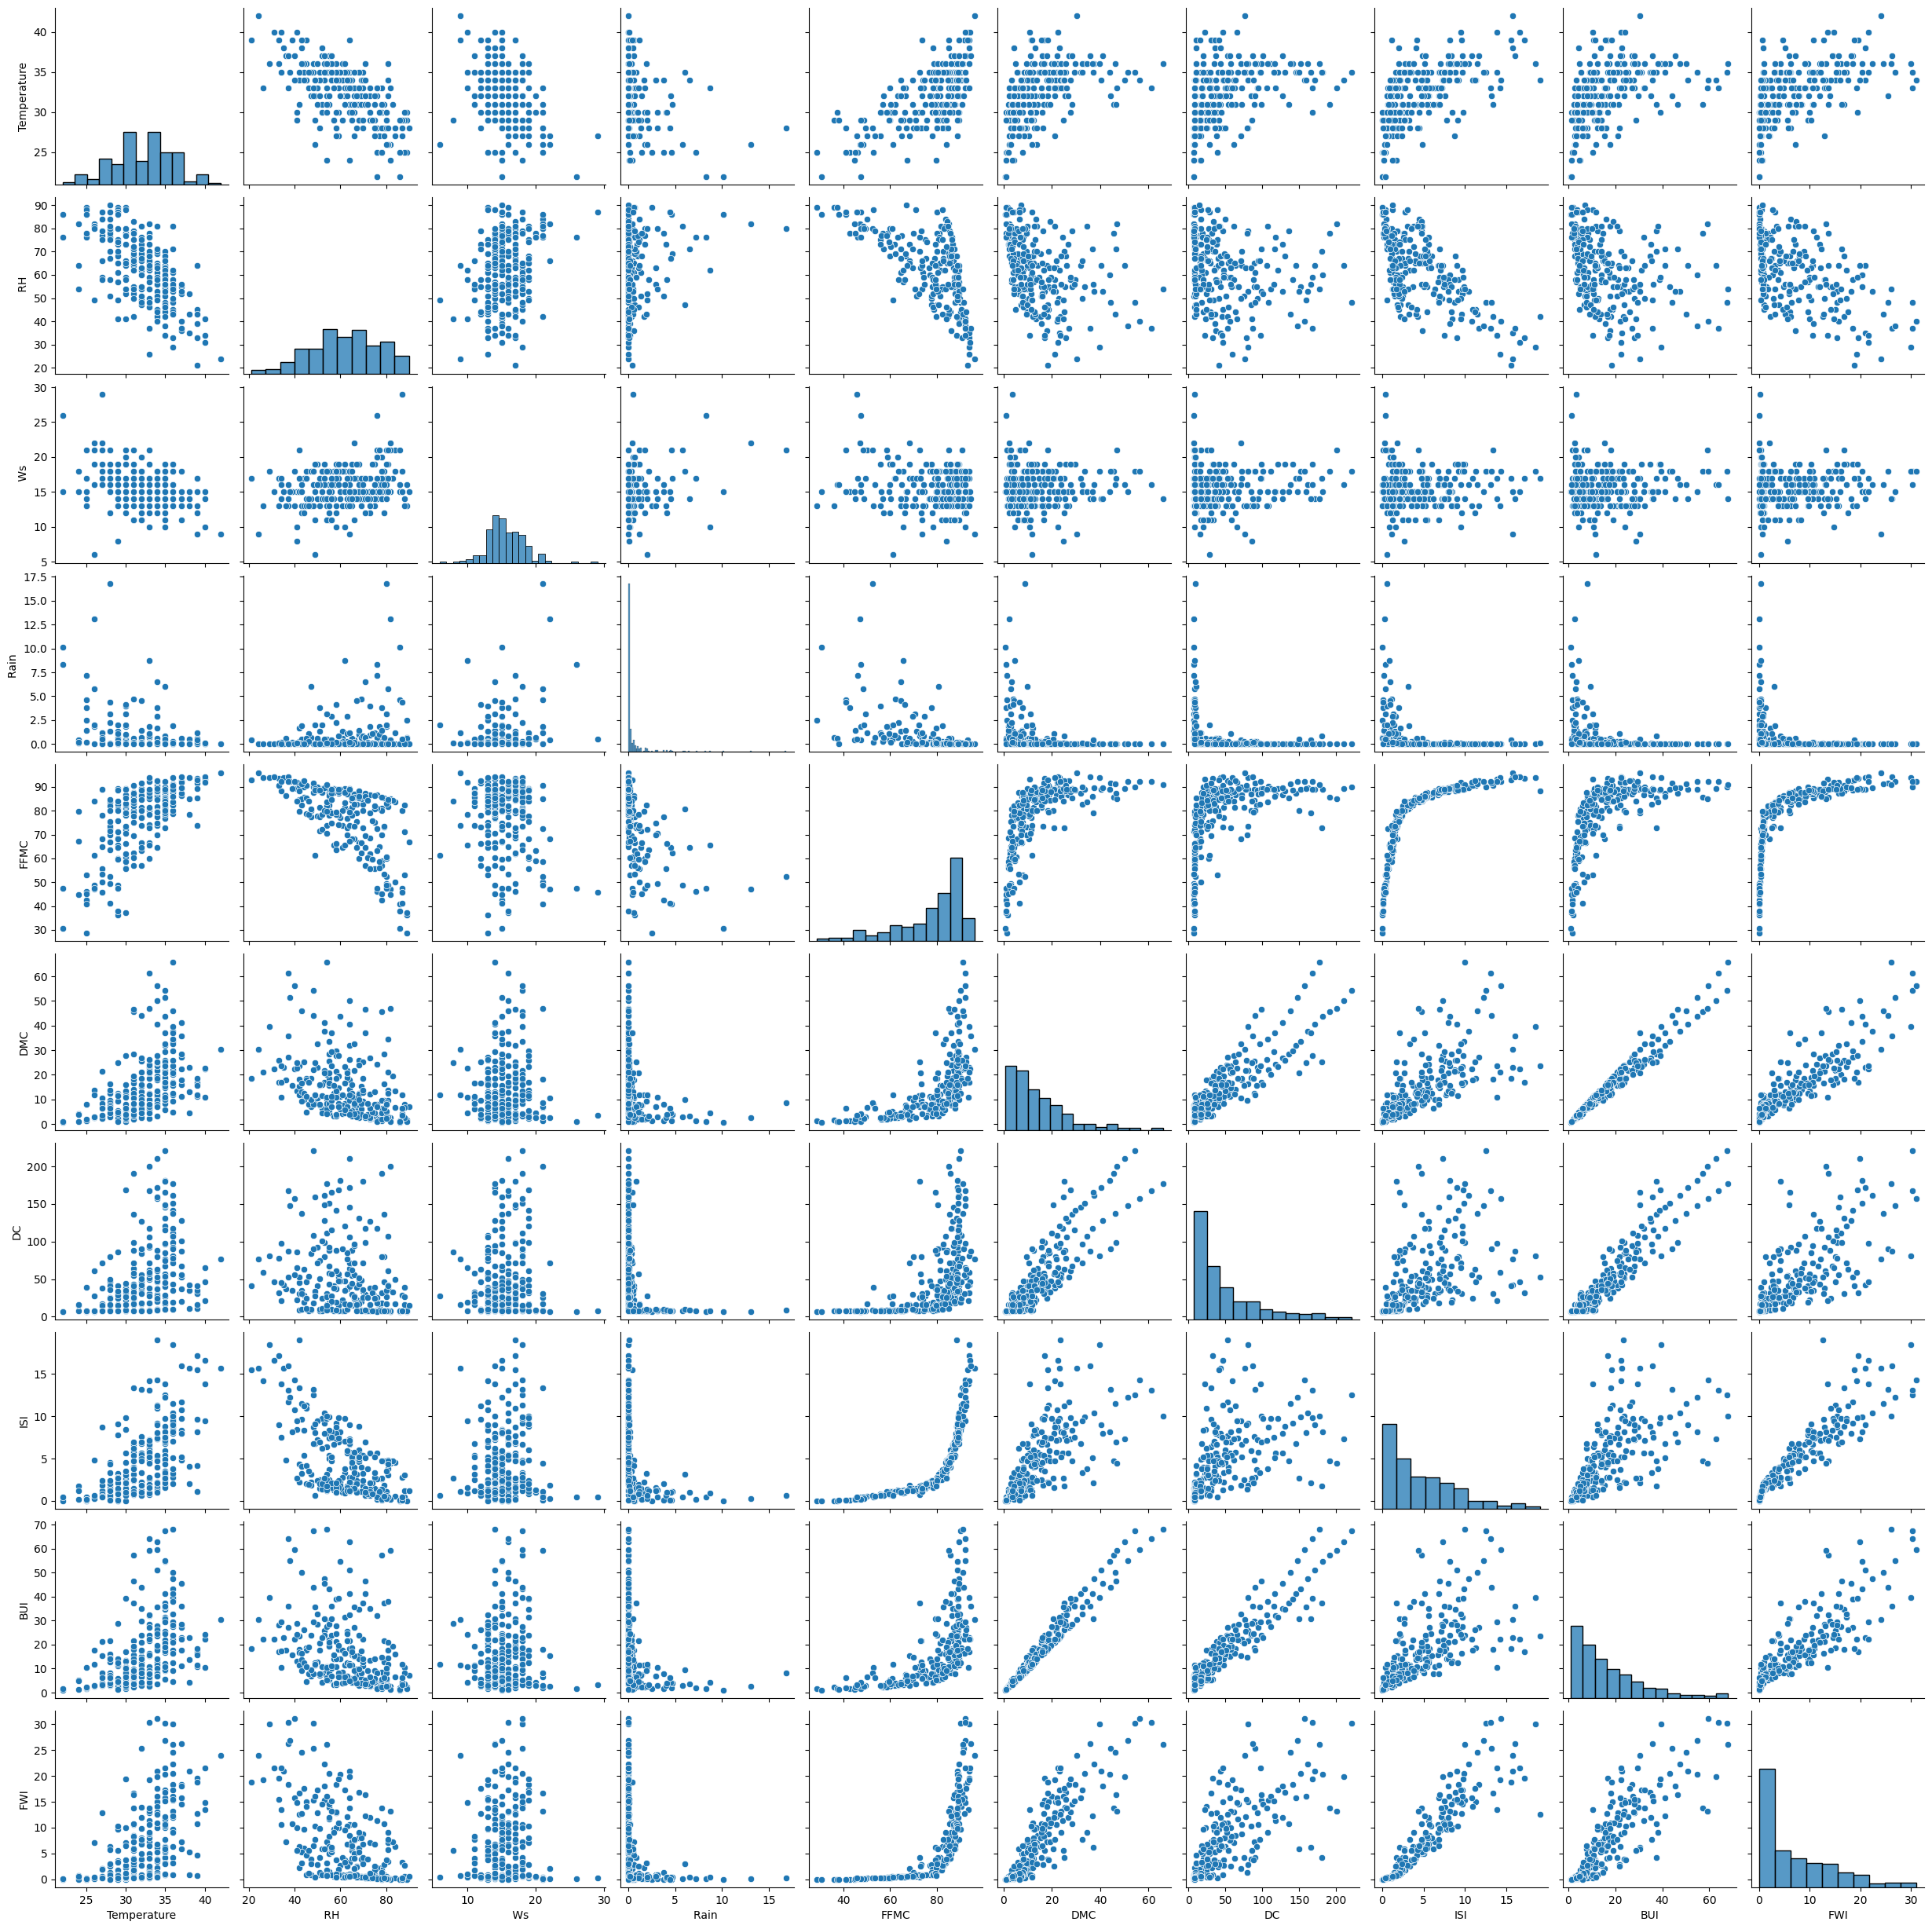

In [19]:
sns.pairplot(df.drop(['day','month','year'],axis = 1))

In [20]:
## ffmc , dmc , dc , isi , buii have a clear positive correlation regression with fwi, temp has a lower, rh has a low negative correlation, ws is kinda random, idk if it will work with ws 

In [21]:
df.drop(columns = ['day','month','year'],inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1    RH          243 non-null    float64
 2    Ws          243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(10), object(1)
memory usage: 21.0+ KB


In [24]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')

In [25]:
X = df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df['FWI']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
lasso_reg = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls balance between L1 (Lasso) and L2 (Ridge)

# Train models
lin_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
y_pred_elastic = elastic_net.predict(X_test_scaled)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_elastic, "ElasticNet Regression")


=== Linear Regression ===
Mean Squared Error: 0.3554
R² Score: 0.9883

=== Ridge Regression ===
Mean Squared Error: 0.5645
R² Score: 0.9814

=== Lasso Regression ===
Mean Squared Error: 0.5376
R² Score: 0.9823

=== ElasticNet Regression ===
Mean Squared Error: 1.0292
R² Score: 0.9660



In [29]:
lin_reg

LinearRegression()

In [30]:
scaler

StandardScaler()

In [31]:
import pickle

pickle.dump(ridge_reg,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))